# Sentiment Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML

In [5]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']

TOKENS = pd.read_csv('output/CORPUS.csv', delimiter = '|').set_index(OHCO)
VOCAB = pd.read_csv('output/VOCAB.csv', delimiter = '|').set_index('term_str')
LIB = pd.read_csv('output/LIB.csv', delimiter = '|').set_index('ID')
BOW = pd.read_csv('output/BOW.csv', delimiter = '|').set_index(['book_id','chap_num','term_str'])

SALEX = pd.read_csv('data/lexicons/salex_nrc.csv').set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [10]:
LIB['chap_labels'] = LIB['chap_labels'].apply(eval)

In [12]:
LIB['label'] = LIB['title'] + ', ' + LIB['date'].astype('str')
LIB

,file,title,clip_range,chap_regex,TOC_range,date,chap_labels,label
ID,,,,,,,,
1,/sfs/gpfs/tardis/home/cwp5xyj/Documents/MSDS/D...,A Game of Thrones,"(212, 14145)",^[A-Z ]+$,"(20, 165)",1996,"[Prologue, Bran 1, Catelyn 1, Daenerys 1, Edda...","A Game of Thrones, 1996"
2,/sfs/gpfs/tardis/home/cwp5xyj/Documents/MSDS/D...,A Clash of Kings,"(382, 16150)",^[A-Z ]+$,"(55, 334)",1998,"[PROLOGUE 1, ARYA 1, SANSA 1, TYRION 1, BRAN 1...","A Clash of Kings, 1998"
3,/sfs/gpfs/tardis/home/cwp5xyj/Documents/MSDS/D...,A Storm of Swords,"(451, 20253)",^[A-Z ]+$,"(59, 386)",2000,"[PROLOGUE 1, JAIME 1, CATELYN 1, ARYA 1, TYRIO...","A Storm of Swords, 2000"
4,/sfs/gpfs/tardis/home/cwp5xyj/Documents/MSDS/D...,A Feast for Crows,"(343, 13963)",^[A-Z’‘ʼ' ]+$,"(87, 271)",2005,"[PROLOGUE 1, THE PROPHET 1, THE CAPTAIN OF GUA...","A Feast for Crows, 2005"
5,/sfs/gpfs/tardis/home/cwp5xyj/Documents/MSDS/D...,A Dance with Dragons,"(344, 18874)",^[A-Z’‘ʼ' ]+$,"(104, 250)",2011,"[PROLOGUE 1, TYRION 1, DAENERYS 1, JON 1, BRAN...","A Dance with Dragons, 2011"


In [18]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

VOCAB_SENT = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

BOW_SENT = BOW.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

for col in emo_cols:
    BOW_SENT[col] = BOW_SENT[col] * BOW_SENT.tfidf
    


In [31]:
DOC_SENT = BOW_SENT.groupby(['book_id','chap_num'])[emo_cols].mean()

In [32]:
DOC_SENT

anger  anticipation   disgust      fear       joy  \
book_id chap_num                                                         
1       1         0.000262      0.000168  0.000161  0.000263  0.000148   
        2         0.000232      0.000241  0.000189  0.000332  0.000167   
        3         0.000342      0.000331  0.000195  0.000405  0.000394   
        4         0.000193      0.000133  0.000150  0.000227  0.000156   
        5         0.000227      0.000155  0.000160  0.000312  0.000188   
...                    ...           ...       ...       ...       ...   
5       69        0.000273      0.000135  0.000171  0.000301  0.000091   
        70        0.000129      0.000066  0.000121  0.000177  0.000104   
        71        0.000155      0.000132  0.000089  0.000191  0.000119   
        72        0.000121      0.000118  0.000105  0.000196  0.000095   
        73        0.000145      0.000138  0.000141  0.000209  0.000119   

                   sadness  surprise     trust  sentiment  
book_id chap_num                                           
1       1         0.000224  0.000123  0.000228  -0.000164  
        2         0.000329  0.000138  0.000255  -0.000144  
        3         0.000280  0.000114  0.000460  -0.000070  
        4         0.000163  0.000099  0.000229  -0.000056  
        5         0.000263  0.000130  0.000254  -0.000117  
...                    ...       ...       ...        ...  
5       69        0.000224  0.000056  0.000142  -0.000369  
        70        0.000137  0.000052  0.000160  -0.000107  
        71        0.000147  0.000098  0.000167  -0.000102  
        72        0.000152  0.000059  0.000090  -0.000194  
        73        0.000125  0.000079  0.000172  -0.000106  

[344 rows x 9 columns]

In [33]:
DCM = pd.read_csv('output/DCM.csv').set_index(['book_id', 'chap_num'])
# DOC_SENT = DOC_SENT.join(DCM[['label', 'chapter_title', 'POV']])
DOC_SENT

anger  anticipation   disgust      fear       joy  \
book_id chap_num                                                         
1       1         0.000262      0.000168  0.000161  0.000263  0.000148   
        2         0.000232      0.000241  0.000189  0.000332  0.000167   
        3         0.000342      0.000331  0.000195  0.000405  0.000394   
        4         0.000193      0.000133  0.000150  0.000227  0.000156   
        5         0.000227      0.000155  0.000160  0.000312  0.000188   
...                    ...           ...       ...       ...       ...   
5       69        0.000273      0.000135  0.000171  0.000301  0.000091   
        70        0.000129      0.000066  0.000121  0.000177  0.000104   
        71        0.000155      0.000132  0.000089  0.000191  0.000119   
        72        0.000121      0.000118  0.000105  0.000196  0.000095   
        73        0.000145      0.000138  0.000141  0.000209  0.000119   

                   sadness  surprise     trust  sentiment  
book_id chap_num                                           
1       1         0.000224  0.000123  0.000228  -0.000164  
        2         0.000329  0.000138  0.000255  -0.000144  
        3         0.000280  0.000114  0.000460  -0.000070  
        4         0.000163  0.000099  0.000229  -0.000056  
        5         0.000263  0.000130  0.000254  -0.000117  
...                    ...       ...       ...        ...  
5       69        0.000224  0.000056  0.000142  -0.000369  
        70        0.000137  0.000052  0.000160  -0.000107  
        71        0.000147  0.000098  0.000167  -0.000102  
        72        0.000152  0.000059  0.000090  -0.000194  
        73        0.000125  0.000079  0.000172  -0.000106  

[344 rows x 9 columns]

In [34]:
AGOT_chaps_thin = DOC_SENT.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(1)).join(DCM['POV'], on = ['book_id', 'chap_num'])
ACOK_chaps_thin = DOC_SENT.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(2)).join(DCM['POV'], on = ['book_id', 'chap_num'])
ASOS_chaps_thin = DOC_SENT.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(3)).join(DCM['POV'], on = ['book_id', 'chap_num'])
AFFC_chaps_thin = DOC_SENT.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(4)).join(DCM['POV'], on = ['book_id', 'chap_num'])
ADWD_chaps_thin = DOC_SENT.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(5)).join(DCM['POV'], on = ['book_id', 'chap_num'])

In [35]:
AGOT_chaps_thin

,book_id,chap_num,emo,value,POV
0,1,1,anger,0.000262,prologue
1,1,1,anticipation,0.000168,prologue
2,1,1,disgust,0.000161,prologue
3,1,1,fear,0.000263,prologue
4,1,1,joy,0.000148,prologue
...,...,...,...,...,...
652,1,73,joy,0.000267,daenerys
653,1,73,sadness,0.000258,daenerys
654,1,73,surprise,0.000099,daenerys
655,1,73,trust,0.000296,daenerys


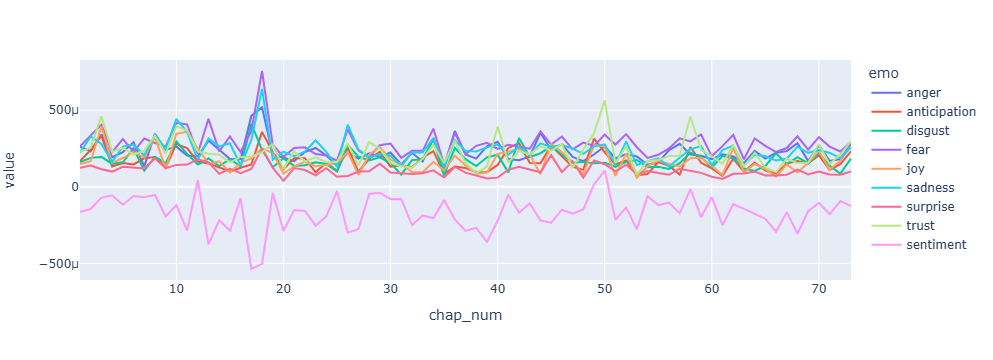

In [37]:
px.line(AGOT_chaps_thin, x='chap_num', y='value', color='emo', hover_name = 'POV')

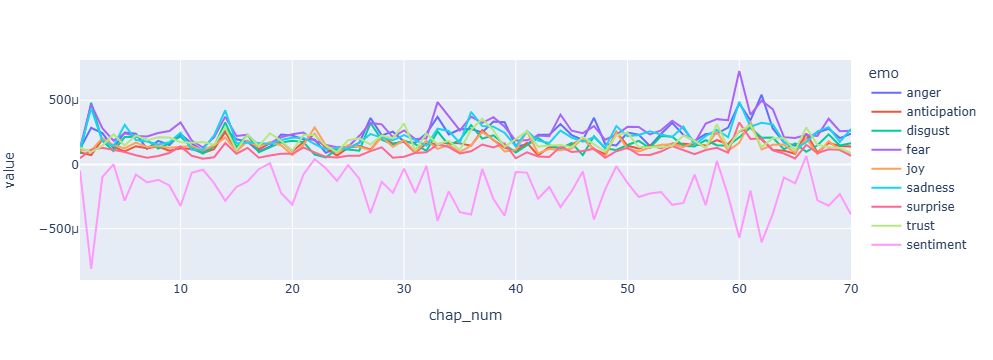

In [38]:
px.line(ACOK_chaps_thin, x='chap_num', y='value', color='emo', hover_name = 'POV')

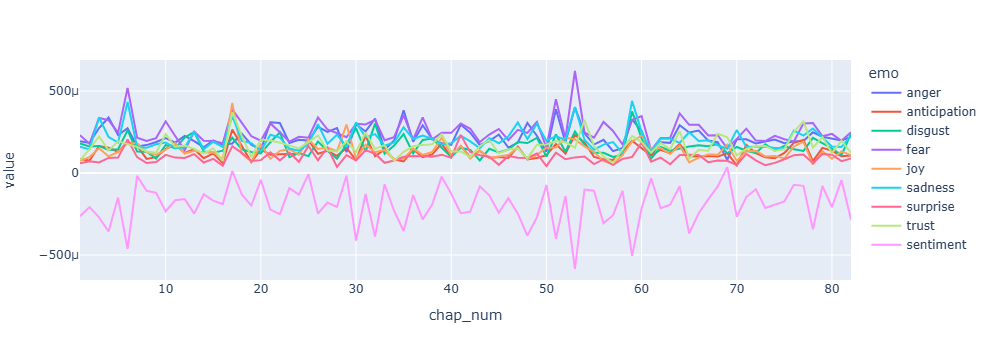

In [39]:
px.line(ASOS_chaps_thin, x='chap_num', y='value', color='emo', hover_name = 'POV')

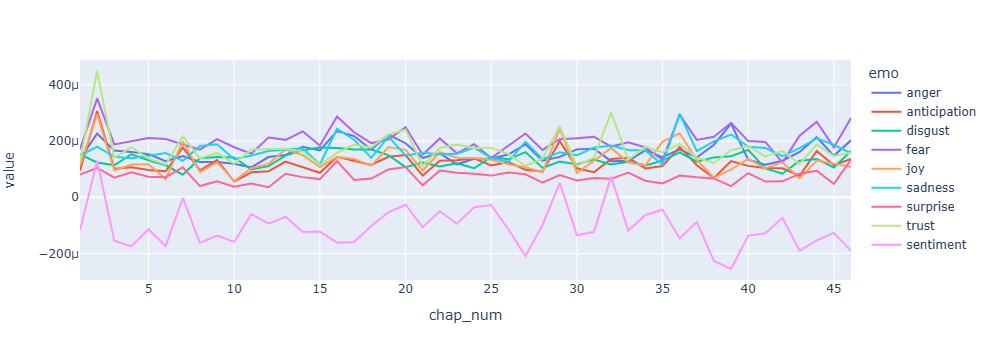

In [40]:
px.line(AFFC_chaps_thin, x='chap_num', y='value', color='emo', hover_name = 'POV')

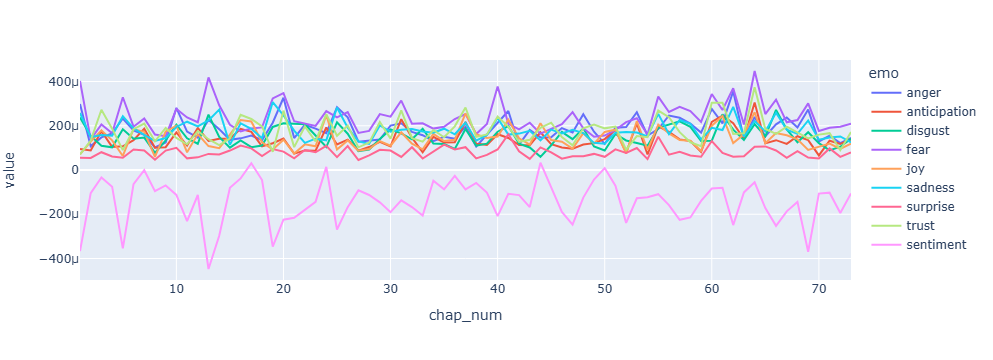

In [41]:
px.line(ADWD_chaps_thin, x='chap_num', y='value', color='emo', hover_name = 'POV')

I think I have enough going on to get credit for this part.


## Word2Vec

In [42]:
from gensim.models import word2vec
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE as tsne

import gensim
gensim.__version__

'4.3.3'

In [43]:
valid_pos = ['NN', 'NNS', 'VB', 'VBP', 'VBD', 'VBN', 'VBG', 'VBZ']
filtered_TOKENS = TOKENS[TOKENS['pos'].isin(valid_pos)]

In [44]:
filtered_TOKENS

pos_tuple  pos  \
book_id chap_num para_num sent_num token_num                            
1       1        0        0        3             ('start', 'VB')   VB   
                                   8            ('urged', 'VBD')  VBD   
                                   11           ('woods', 'NNS')  NNS   
                                   12           ('began', 'VBD')  VBD   
                                   14             ('grow', 'VB')   VB   
...                                                          ...  ...   
5       73       139      5        16            ('eyes', 'NNS')  NNS   
                                   18            ('boys', 'NNS')  NNS   
                                   20           ('girls', 'NNS')  NNS   
                 140      0        3            ('hands', 'NNS')  NNS   
                                   6          ('daggers', 'NNS')  NNS   

                                             token_str term_str pos_group  
book_id chap_num para_num sent_num token_num                               
1       1        0        0        3             start    start        VB  
                                   8             urged    urged        VB  
                                   11            woods    woods        NN  
                                   12            began    began        VB  
                                   14             grow     grow        VB  
...                                                ...      ...       ...  
5       73       139      5        16             eyes     eyes        NN  
                                   18             boys     boys        NN  
                                   20            girls    girls        NN  
                 140      0        3             hands    hands        NN  
                                   6           daggers  daggers        NN  

[669355 rows x 5 columns]

In [48]:
filtered_VOCAB = filtered_TOKENS.groupby('term_str').agg(
    n=('term_str', 'count'),
    pos_group=('pos', lambda x: x.str[:2].value_counts().idxmax()))

In [46]:
BAG = ['book_id', 'chap_num', 'para_num']

docs = filtered_TOKENS.dropna(subset=['term_str'])\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
docs = [doc for doc in docs if len(doc) > 1]

params = dict(
    window = 2,
    vector_size = 256,
    min_count = 50,
    workers = 4
)

model = word2vec.Word2Vec(docs, **params)

In [49]:
def get_vector(row):
    w = row.name
    try:
        vec = model.wv[w]
    except KeyError as e:
        vec = None
    return vec

In [50]:
VOCAB_W2V = pd.DataFrame(filtered_VOCAB.apply(get_vector, axis=1).dropna()).apply(lambda x: pd.Series(x[0]), axis=1)

In [51]:
VOCAB_W2V

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
term_str,,,,,,,,,,,,,,,,,,,,,
abandoned,0.047783,-0.029266,0.074208,0.131808,0.219311,-0.141734,0.120098,-0.032129,-0.112342,0.183244,...,0.184256,-0.159967,-0.058620,-0.018277,-0.153277,0.033004,-0.085958,-0.080227,-0.381231,0.089464
accept,0.017402,-0.062578,0.064067,0.071480,0.184738,-0.017622,0.105393,-0.038662,-0.061893,0.212498,...,0.079549,0.041801,0.006155,-0.053926,-0.087865,0.035445,-0.156162,-0.022631,-0.229087,0.036916
added,-0.002465,-0.061982,0.031227,0.072164,0.194965,-0.034820,0.139183,-0.079646,-0.059846,0.142270,...,0.134644,0.000856,-0.042898,-0.058716,-0.124978,0.056400,-0.117384,-0.043767,-0.248900,0.025031
admit,0.025405,-0.051089,0.024450,0.065006,0.144723,0.002135,0.114413,-0.059820,-0.060045,0.131820,...,0.140165,-0.010154,-0.040741,-0.069469,-0.142826,0.050765,-0.115616,0.000202,-0.289462,0.043069
admitted,0.035967,-0.009928,0.043240,0.029511,0.177555,0.014926,0.125670,-0.065878,-0.012013,0.146091,...,0.123931,0.014845,-0.027721,-0.084218,-0.145879,0.098524,-0.171292,-0.016530,-0.323559,0.059694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yesterday,-0.027977,-0.037315,-0.002589,0.097354,0.184472,-0.070557,0.128008,-0.092107,-0.062794,0.140002,...,0.157310,-0.127928,-0.108717,-0.051026,-0.150958,0.073911,-0.071094,-0.048090,-0.322359,0.059533
yield,-0.026481,-0.085918,0.068863,0.071219,0.220046,0.033183,0.095241,-0.074770,0.002367,0.119717,...,0.057989,0.030768,-0.007654,-0.117568,-0.121850,0.089627,-0.150902,0.019994,-0.162301,0.038474
you,-0.079049,-0.130699,-0.014113,0.070789,0.125381,0.031361,0.116309,-0.075267,-0.085788,0.153520,...,0.050413,0.091157,-0.058219,-0.122717,-0.122946,-0.006937,-0.135405,0.081972,-0.153499,0.012417


In [57]:
tsne_engine = tsne(
    perplexity=40, 
    n_components=2, 
    init='pca', 
    n_iter=2500, 
    random_state=3502)

tsne_model = tsne_engine.fit_transform(VOCAB_W2V.to_numpy())

TSNE = pd.DataFrame(tsne_model, columns=['x','y'], index=VOCAB_W2V.index)

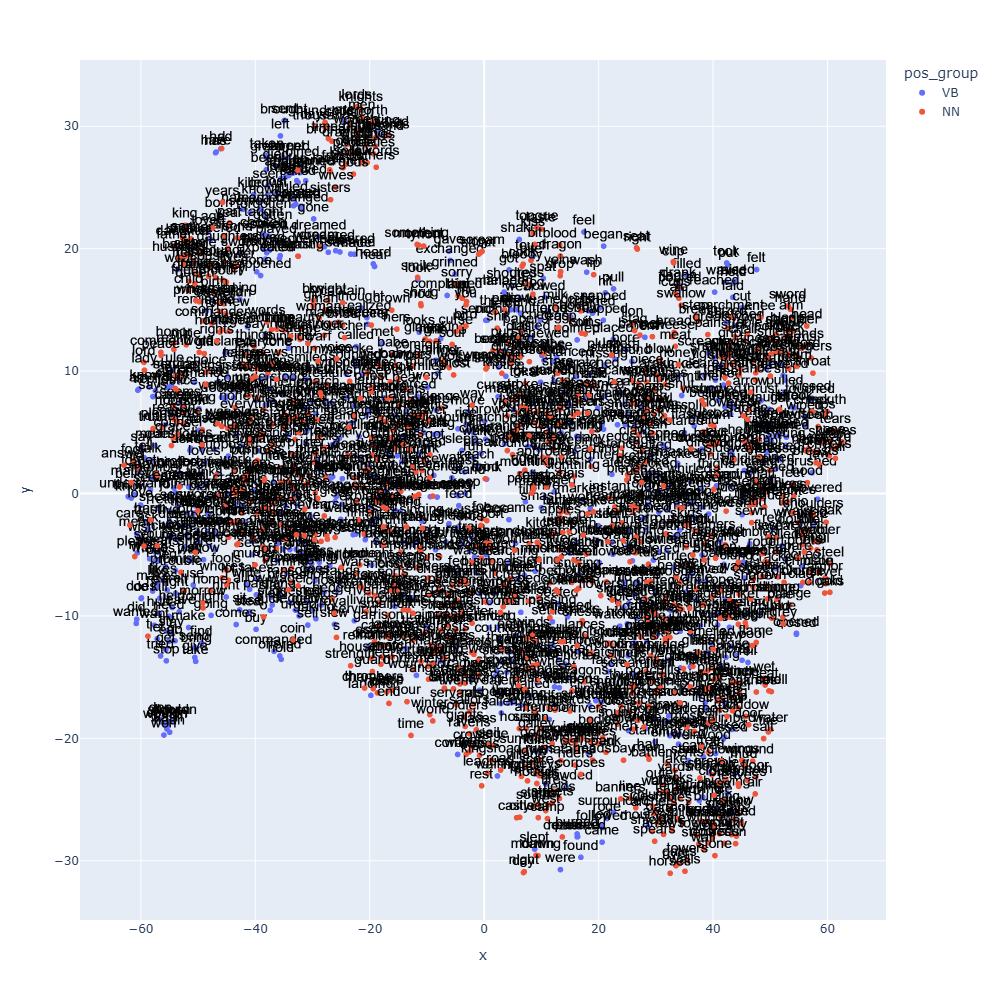

In [58]:
X = TSNE.join(filtered_VOCAB, how='left')

px.scatter(X.reset_index(), 'x', 'y', 
        text='term_str', 
        color='pos_group', 
        hover_name='term_str',          
        height=1000,
        width=1200)\
    .update_traces(
        mode='markers+text', 
        textfont=dict(color='black', size=14, family='Arial'),
        textposition='top center')

In [59]:
VOCAB_SENT.to_csv('output/VOCAB_SENT.csv')
BOW_SENT.to_csv('output/BOW_SENT.csv')
DOC_SENT.to_csv('output/DOC_SENT.csv')
VOCAB_W2V.to_csv('output/VOCAB_W2V.csv')

In [63]:
all_thin = DOC_SENT.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).join(DCM['POV'], on = ['book_id', 'chap_num'])

In [67]:
dany_thin = all_thin[all_thin['POV']=='daenerys']
dany_thin['chap_order'] = range(1, len(dany_thin) + 1)

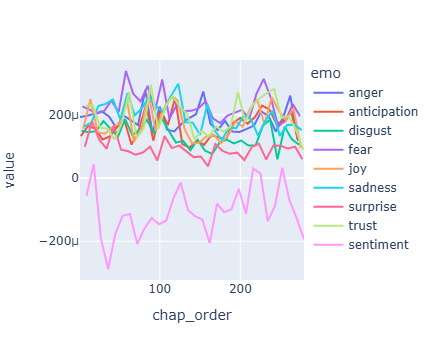

In [69]:
px.line(dany_thin, x='chap_order', y='value', color='emo', hover_name = 'book_id')